
<img src='https://www.dropbox.com/s/125k1wnxkl6bgs0/class_logo.jpg?dl=1' alt="Smiley face" align="center" style="width: 600px;"/>



# Notebook 3




### Topics covered
* * *
 * Return distributions and moments of a return distribution
 * Annualization of returns
 * Log returns
 * Excess returns and risk premiums
 * Variances and Covariances


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#GlobalFinMonthly
url="https://www.dropbox.com/s/3k35mt3t57ygff2/GlobalFinMonthly.csv?dl=1"
Data = pd.read_csv(url,na_values=-99)
# tell python Date is date:
Data['Date']=pd.to_datetime(Data['Date'])
# set an an index
Data=Data.set_index(['Date'])

Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 647 entries, 1963-02-28 to 2016-12-31
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RF                647 non-null    float64
 1   MKT               647 non-null    float64
 2   USA30yearGovBond  647 non-null    float64
 3   EmergingMarkets   647 non-null    float64
 4   WorldxUSA         647 non-null    float64
 5   WorldxUSAGovBond  646 non-null    float64
dtypes: float64(6)
memory usage: 35.4 KB


# Statistical Tests

In this section we will learn how to use statistical package SCIPY and test if the return distribution is normal.

## Statistical Package

We can also do the computation precisely  without using a simulation which is the way we will typically do.

For that we will import the normal density function using the SCIPY library


SCIPY
 - This is a stats package
 - It has a lot of stuff in it
 - I will talk about only the stuff we need 
 - But feel free to have fun

https://docs.scipy.org/doc/scipy/reference/

https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

In [36]:
# Here I am only importing the normal distribution

from scipy.stats import norm

# I will use the MKT sample moments to calibrate the distribution so we can compare apples to apples
mu,sigma=Data.MKT.mean(),Data.MKT.std()
# and I am creating this p object which is the standard normal distribution
p=norm(Data.MKT.mean(),Data.MKT.std())
p

Here is what that looks like

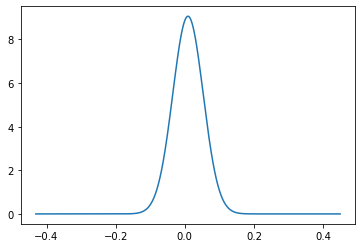

In [47]:
# creating a grid to evaluate the density around the relevant range (-6 to +6 std relative to the mean)
grid=np.linspace(mu-10*sigma,mu+10*sigma,1000)
grid
#Plot the normal density for this range 
plt.plot(grid, p.pdf(grid))

In [48]:
p.pdf(grid)*100

array([1.74864727e-19, 2.13580217e-19, 2.60762879e-19, 3.18241231e-19,
       3.88233545e-19, 4.73429814e-19, 5.77090712e-19, 7.03167030e-19,
       8.56443758e-19, 1.04271382e-18, 1.26898751e-18, 1.54374478e-18,
       1.87723908e-18, 2.28186322e-18, 2.77258942e-18, 3.36749881e-18,
       4.08841783e-18, 4.96168320e-18, 6.01906070e-18, 7.29884849e-18,
       8.84720130e-18, 1.07197191e-17, 1.29833520e-17, 1.57186844e-17,
       1.90226708e-17, 2.30119130e-17, 2.78265836e-17, 3.36351206e-17,
       4.06398431e-17, 4.90836659e-17, 5.92581233e-17, 7.15129561e-17,
       8.62675574e-17, 1.04024637e-16, 1.25386519e-16, 1.51074589e-16,
       1.81952459e-16, 2.19053588e-16, 2.63614168e-16, 3.17112279e-16,
       3.81314485e-16, 4.58331264e-16, 5.50682907e-16, 6.61377847e-16,
       7.94005711e-16, 9.52847815e-16, 1.14300832e-15, 1.37056986e-15,
       1.64277807e-15, 1.96826038e-15, 2.35728525e-15, 2.82206921e-15,
       3.37714040e-15, 4.03976876e-15, 4.83047491e-15, 5.77363187e-15,
      

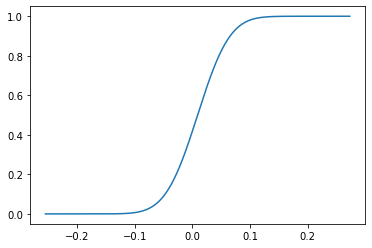

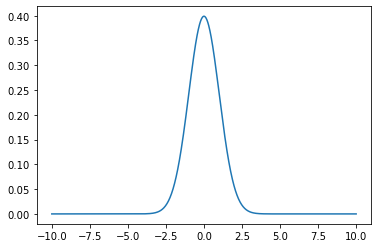

In [53]:
p=norm(0,1)
grid=np.linspace(-10,10,1000)
plt.plot(grid, p.pdf(grid))

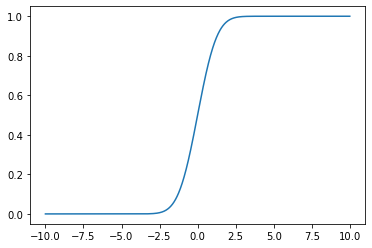

In [52]:
p=norm(0,1)
grid=np.linspace(-10,10,1000)
plt.plot(grid, p.cdf(grid))

In [50]:
# However it is often more covenient to work with the standard normal distribution
threshold=4
ps=norm(0,1)
probm=ps.cdf(-threshold)
probp=1-ps.cdf(threshold)
print('The probability of such extreme tail events')
print([probm,probp])
print('The number of such extreme tail events we expect in a sample as large as ours')
print([probm*T,probp*T])

The probability of such extreme tail events
[3.167124183311986e-05, 3.167124183311998e-05]
The number of such extreme tail events we expect in a sample as large as ours
[0.020491293466028553, 0.020491293466028626]


## Confidence Intervals and T-tests

We will often use the opposite operation:

* Given a probability , lets say P=1%, we want to know the value X for which there is less than P probability that some reference distribution produces a value higher than X.

* Given that we observed X, P gives us the likelihood that X came from this reference distribution

* This reference distribution is our NULL-Hypothesis

* For example, lets say our null hypothesis is that the market returns are normally distributed with a certain mean and standard deviation. If you observe X, how low X would have to be for the probability that X was sampled from this reference distribution is less than, say, 1%

* The function that answers this question is the inverse cdf which we call using .isf


In [60]:
ps

In [61]:
# here for the standard normal

# So, the observation would have to be below the mean by the follow number of standard deviations

ps.isf(0.01)


2.3263478740408408

* If we observe such an extreme observation we would say that we can reject the reference distribution with a confidence of 99% or a pvalue of 1%.

* Of course, a formal test of whether a random variable is normally distributed for any mean and standard deviation is much more complicated and less powerful.

* So it is not really used that much with financial data in practice.

* But as practicioners it is important to be aware of large deviations of normality specially at higher frequecies, daily returns, minute-to-minute returns

* We will revisit this once we work with daily data